In [ ]:
pip install MTCNN

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn import MTCNN
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
detector = MTCNN()
import os

In [ ]:
class FaceAligner:
    #modify the box size with changing the values for desiredLeftEye
    def __init__(self, desiredLeftEye=(0.30, 0.30),
        desiredFaceWidth=224, desiredFaceHeight=None):
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    def align(self, image, left_eye, right_eye):

        # compute the angle between the eye centroids
        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))

        #compute the desired right eye x-coordinate based on the
        # desired x-coordinate of the left eye
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]

        # determine the scale of the new resulting image by taking
        # the ratio of the distance between eyes in the *current*
        # image to the ratio of distance between eyes in the
        # *desired* image
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist

        # compute center (x, y)-coordinates (i.e., the median point)
        # between the two eyes in the input image
        eyesCenter = (int((left_eye[0] + right_eye[0]) // 2),
                      int((left_eye[1] + right_eye[1]) // 2))
        # grab the rotation matrix for rotating and scaling the face
        #print(eyesCenter,angle,scale)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])

        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC)
        # return the aligned face
        return output

In [ ]:
def detect_face(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    conv_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    dect = face_detect(conv_gray,1)
    print("The number of faces in the image are :", len(dect),"\nCoordinates of top left and right bottom corner ",dect)


    for (i, dect) in enumerate(dect):
        (x, y, w, h) = face_utils.rect_to_bb(dect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (210,210,0), 6)


    plt.imshow(image)
    plt.show()
    print("_________________________________________________________")


In [ ]:
def detect_face1(img):
    pixels = pyplot.imread(img)

    faces = detector.detect_faces(pixels)
    #print(faces)
    return faces

In [ ]:
img = 'group.jpg'

In [ ]:
#  # Dimension of extracted data
# for i in range(0,len(faces)):
#   print(data["encodings"][i].shape)


* Total 128 dimensions extracted in embedding of an image.

In [ ]:
# common
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from IPython.display import clear_output as cls

# Data
from glob import glob
import matplotlib.pyplot as plt

# Model
from tensorflow.keras import layers

In [ ]:
!unzip file.zip

unzip:  cannot find or open file.zip, file.zip.zip or file.zip.ZIP.


In [ ]:
#unzip the zipped file being uploaded named as 'cropped'
from zipfile import ZipFile
file_name = 'cropped.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# ROOT DIR
ROOT_PATH = 'cropped'

# Class names
CLASS_NAMES = sorted(os.listdir(ROOT_PATH))

# Image Size
IMAGE_HEIGHT, IMAGE_WIDTH = 160, 160
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# Random Seed
np.random.seed(42)
tf.random.set_seed(42)



In [ ]:
pip install face_recognition

In [ ]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os


#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('cropped'))
knownEncodings = []
knownNames = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the person name from the image path
    name = imagePath.split('/')[-1]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # known_Encodings.append(encodings)

    # print(type(encodings))
    knownEncodings.append(encodings)
    knownNames.append(name)
print(knownEncodings)
print(knownNames)

#save emcodings along with their names in dictionary data
    #
#use pickle to save data into a file for later use
# print(data)
# f = open("face_enc", "wb")
# f.write(pickle.dumps(data))
# f.close()


[[array([-0.13098352,  0.12928402,  0.0305998 , -0.09979754, -0.17805471,
       -0.08407258, -0.12114981, -0.11533877,  0.11647473,  0.07597706,
        0.32070714,  0.02825544, -0.25654122, -0.01882397, -0.13317867,
        0.08343594, -0.16778654, -0.02700459, -0.01764853, -0.08929463,
        0.01723979,  0.04225022,  0.04345262,  0.12759274, -0.00417843,
       -0.2679348 , -0.06882694, -0.12179375,  0.10647064, -0.14317849,
        0.01529326,  0.11074748, -0.23339355, -0.15109879,  0.05858592,
        0.03825029, -0.10173954, -0.10938143,  0.22516698, -0.01392246,
       -0.01981885,  0.00137435,  0.034215  ,  0.26648909,  0.13309067,
        0.06217067,  0.02270172, -0.1221042 ,  0.17222834, -0.21600373,
        0.06053701,  0.25047833,  0.14526524,  0.01053333,  0.01727131,
       -0.15117523,  0.09186196,  0.1238157 , -0.2402544 ,  0.12262316,
        0.08707059, -0.05918508, -0.05820412, -0.1313403 ,  0.19476379,
        0.08832715, -0.1051691 , -0.10357367,  0.1299915 , -0.

Original face


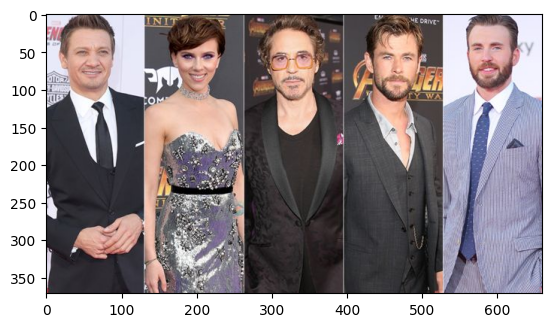

mkdir: cannot create directory ‘Faces1’: File exists
2/2 [==============================] - 0s 16ms/step
The number of faces in the image are : 5 
Coordinates of top left and right bottom corner  rectangles[[(31, 32) (93, 94)], [(557, 25) (619, 87)], [(175, 44) (227, 95)], [(287, 38) (361, 113)], [(428, 38) (502, 113)]]


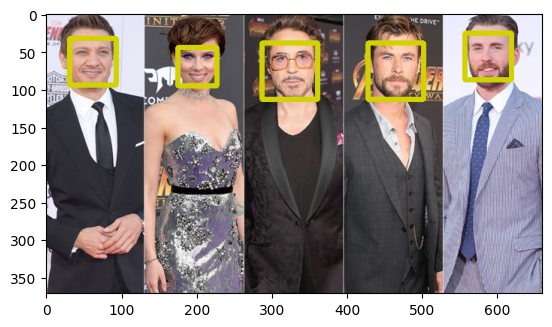

_________________________________________________________
Aligned face: 1, Accuracy: 99.994


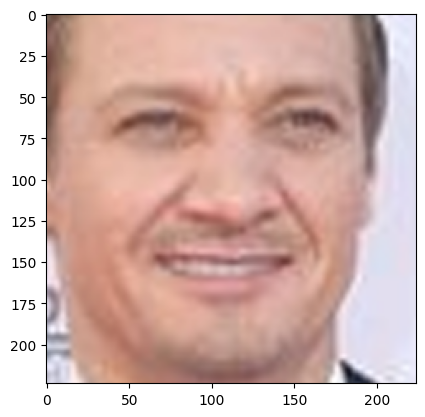

Aligned face: 2, Accuracy: 99.985


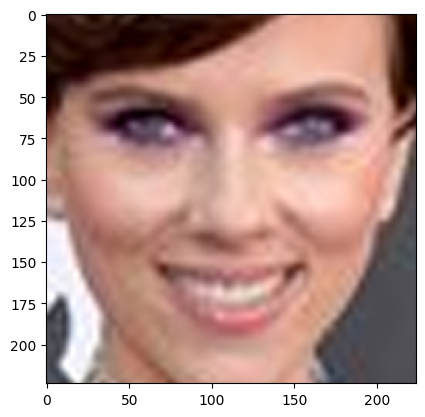

Aligned face: 3, Accuracy: 99.952


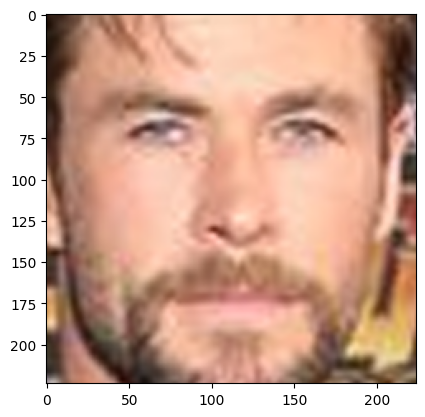

Aligned face: 4, Accuracy: 99.951


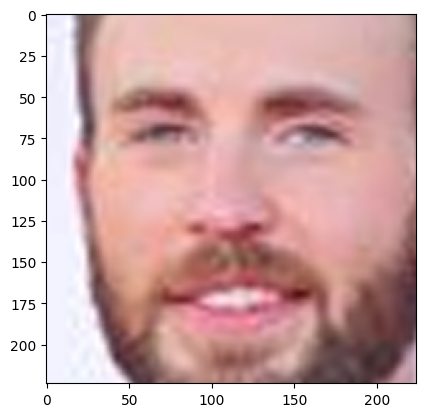

Aligned face: 5, Accuracy: 99.913


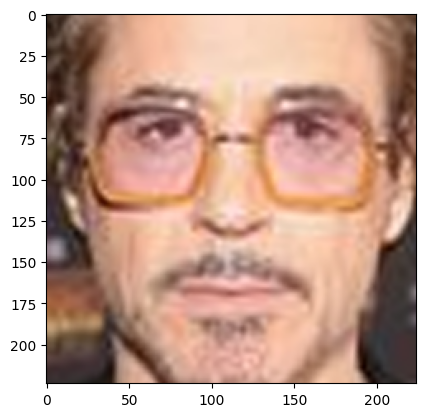

In [ ]:
fa = FaceAligner(desiredFaceWidth=224)  # Calling the FaceAligner function
original_img= cv2.imread(img)           # Reads the image
print("Original face")
plt.imshow(original_img[:, :, ::-1])    # Displays the image
plt.show()

!mkdir Faces1
faces = detect_face1(img)                # Calls the function to display image
detect_face(img)

if len(faces)>0:                        # Calculates the number of faces
      i=0
      #print(faces)
      for face in faces:
            aligned_img = fa.align(cv2.imread(img), face['keypoints']['left_eye'], face['keypoints']['right_eye'])

            print("Aligned face: {}, Accuracy: {:.3f}".format(i+1, face['confidence']*100))
            plt.imshow(aligned_img[:, :, ::-1])
            plt.show()
            image_name = 'image'+str(i+1)+'.jpg'
            image_path = os.path.join('/content/Faces1',image_name)
            cv2.imwrite(image_path,aligned_img[:, :, ::-1])
            i+=1




In [ ]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os


#get paths of each file in folder named Images
#Images here contains my data(folders of various persons)
imagePaths = list(paths.list_images('Faces1'))
CropEncodings = []
knownNames1 = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the person name from the image path
    name = imagePath.split('/')[-1]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    crop_enc = face_recognition.face_encodings(rgb, boxes)

    # loop over the encodings

    CropEncodings.append(crop_enc)
print(CropEncodings)
#save emcodings along with their names in dictionary data
    # data1 = {"encodings": knownEncodings1}
#use pickle to save data into a file for later use
# print(data)
# f = open("face_enc", "wb")
# f.write(pickle.dumps(data))
# f.close()


[[array([-8.91003758e-02,  4.57149148e-02,  1.01544552e-01, -1.09954141e-01,
       -1.01409435e-01,  2.15568542e-02,  9.52370465e-05, -6.42662197e-02,
        2.38661155e-01, -9.03878659e-02,  2.04781070e-01,  1.93424858e-02,
       -3.26817125e-01, -1.20141730e-02, -8.63058642e-02,  1.64373189e-01,
       -1.80706784e-01, -5.34571633e-02, -4.08987850e-02, -6.16311580e-02,
        8.89978930e-02,  1.31016597e-01,  6.73042610e-03,  8.00305307e-02,
       -8.08360875e-02, -3.00674796e-01, -4.80605960e-02, -4.55956012e-02,
       -1.16543278e-01, -1.66915342e-01,  1.85843483e-02,  1.08319961e-01,
       -1.47052765e-01, -7.43001699e-03, -6.92556053e-03,  7.35957250e-02,
       -2.62549892e-02, -1.41620576e-01,  1.12426475e-01,  6.22138418e-02,
       -1.61973268e-01, -2.86614895e-02,  7.19229355e-02,  1.92087829e-01,
        2.10580856e-01, -1.69907026e-02, -2.49745846e-02, -1.12803519e-01,
        1.22329570e-01, -3.71184528e-01, -3.17419767e-02,  1.29076943e-01,
       -5.63633926e-02,

In [ ]:
# knownEncodings
# knownNames
# CropEncodings

In [ ]:
val = []
for i in range(0, len(knownNames)):

  for j in range(0, len(knownNames)):

    results = face_recognition.compare_faces([knownEncodings[i][0]], CropEncodings[j][0])

    if results[0] == True:
      val.append(i)
      print("It's a match!")

    else:

      print("It's not a match!")

print(val)

It's not a match!
It's not a match!
It's not a match!
It's a match!
It's not a match!
It's a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
It's not a match!
[0, 1, 2, 3]


Aligned face: 1, Accuracy: 99.994


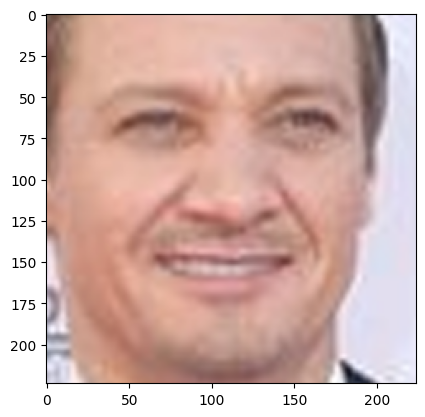

Aligned face: 2, Accuracy: 99.985


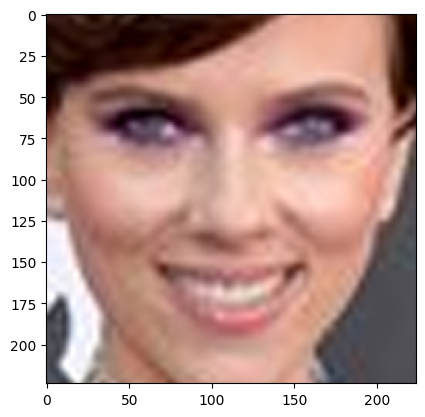

Aligned face: 3, Accuracy: 99.952


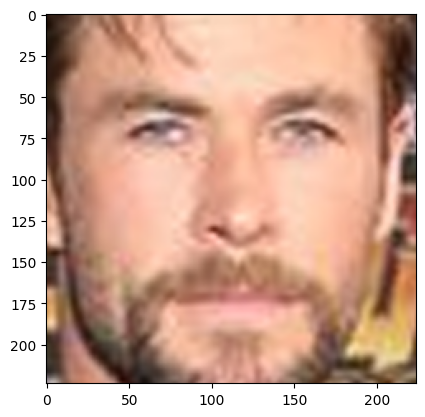

Aligned face: 4, Accuracy: 99.951


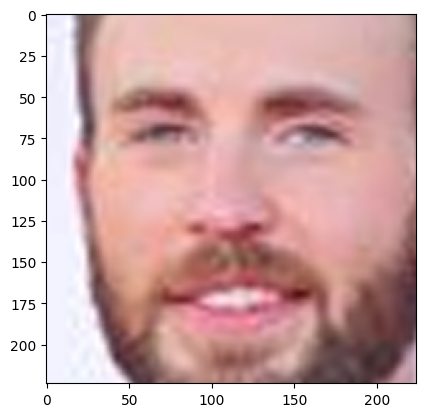

Aligned face: 5, Accuracy: 99.913


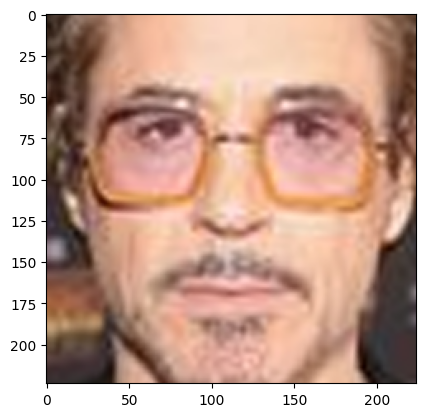

In [ ]:
if len(faces)>0:                        # Calculates the number of faces
      i=0
      #print(faces)
      for face in faces:
            aligned_img = fa.align(cv2.imread(img), face['keypoints']['left_eye'], face['keypoints']['right_eye'])

            print("Aligned face: {}, Accuracy: {:.3f}".format(i+1, face['confidence']*100))
            plt.imshow(aligned_img[:, :, ::-1])
            plt.show()
            image_name = 'image'+str(i+1)+'.jpg'
            image_path = os.path.join('/content/Faces1',image_name)
            cv2.imwrite(image_path,aligned_img[:, :, ::-1])
            i+=1




2/2 [==============================] - 0s 9ms/step
It is a match
Aligned face: 1, Accuracy: 99.994
chris_hemsworth.png
It is a match
Aligned face: 1, Accuracy: 99.985
chris_hemsworth.png
It is a match
Aligned face: 1, Accuracy: 99.952
chris_hemsworth.png
It is a match
Aligned face: 1, Accuracy: 99.951
chris_hemsworth.png
It is a match
Aligned face: 1, Accuracy: 99.913
chris_hemsworth.png
It is a match
Aligned face: 2, Accuracy: 99.994
scarlett_johansson.png
It is a match
Aligned face: 2, Accuracy: 99.985
scarlett_johansson.png
It is a match
Aligned face: 2, Accuracy: 99.952
scarlett_johansson.png
It is a match
Aligned face: 2, Accuracy: 99.951
scarlett_johansson.png
It is a match
Aligned face: 2, Accuracy: 99.913
scarlett_johansson.png
It is a match
Aligned face: 3, Accuracy: 99.994
robert_downey_jr.png
It is a match
Aligned face: 3, Accuracy: 99.985
robert_downey_jr.png
It is a match
Aligned face: 3, Accuracy: 99.952
robert_downey_jr.png
It is a match
Aligned face: 3, Accuracy: 99.951

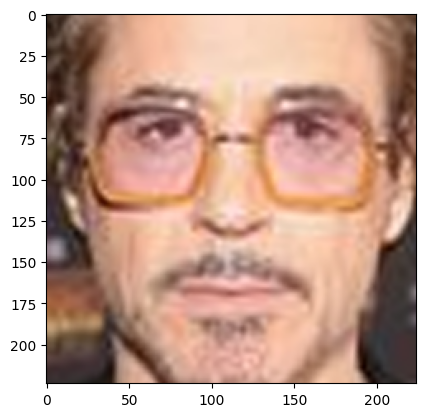

In [ ]:
# The matched indices are captured in list val
faces = detect_face1(img)
for i in val:
  for face in faces:
    aligned_img = fa.align(cv2.imread(img), face['keypoints']['left_eye'], face['keypoints']['right_eye'])
    print('It is a match')
    print("Aligned face: {}, Accuracy: {:.3f}".format(i+1, face['confidence']*100))
    plt.imshow(aligned_img[:, :, ::-1])
    image_name = knownNames[i]
    print(image_name)
    cv2.imwrite(image_path,aligned_img[:, :, ::-1])
